<a href="https://colab.research.google.com/github/sensei-jirving/05.16.22-Data-Enrichment-Notes/blob/main/Week_16/Lecture_02/Housing/PreClass_Diagnosing_Linear_Regression_Coefficients_06_15_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Linear to Logistic Regression Coefficients

- 06/15/22
- James Irving

## Learning Objectives



- To review how linear regression predicts a continuous value.
- To understand what coefficients are and how they are used to calcualte the target.

- Lesson Duration:
    - ~10 mins

# Predicting the Price of a Home Using Linear Regression

<img src="https://github.com/jirvingphd/from-linear-to-logistic-regression-brief-intro/blob/main/images/istock24011682medium_1200xx1697-955-0-88.jpg?raw=1" width=60% alt="Source: https://images.app.goo.gl/oJoMSGU8LGgDjkA76">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')
plt.rcParams['figure.facecolor']='white'

In [ ]:
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, plot_confusion_matrix,
                             classification_report)

## Customized Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')

In [ ]:
## Load in the King's County housing dataset and display the head and info
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv")
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


None

In [ ]:
## FILTERING EXTREME VALUES FOR DEMONSTRATION PURPOSES
df = df.loc[( df['bedrooms'] <8) & (df['price'] < 2_000_000) & df['bathrooms']>0]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000.0000",3,2.5000,1530,1131,3.0000,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,6600060120,20150223T000000,"400,000.0000",4,2.5000,2310,5813,2.0000,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,1523300141,20140623T000000,"402,101.0000",2,0.7500,1020,1350,2.0000,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,291310100,20150116T000000,"400,000.0000",3,2.5000,1600,2388,2.0000,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


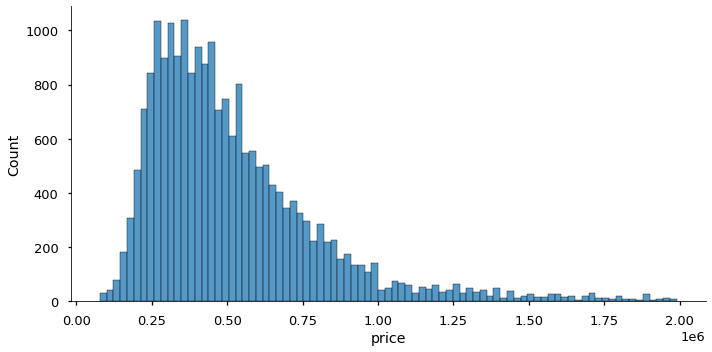

In [ ]:

## Visualize the distribution of house prices (using seaborn!)
sns.displot(df['price'],aspect=2);

## Visualizing Our Features vs Our Target

- We want to determine how features of a home influence its sale price. 
- Specifically, we will be using:
    - `sqft_living`:Square-Footage of all Living Areas
    - `bedrooms`: # of Bedrooms
    - `bathrooms`: # of Bathrooms

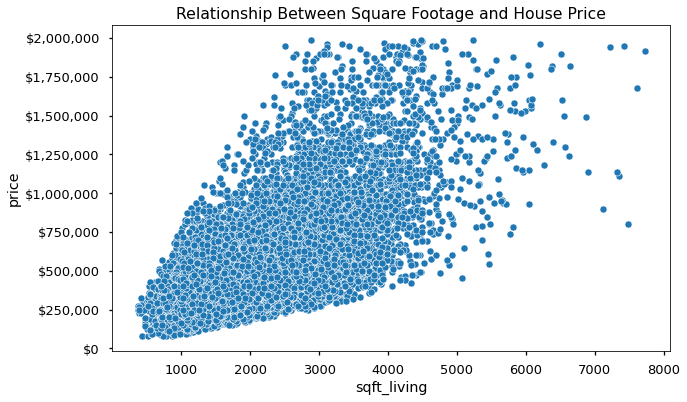

In [ ]:
from matplotlib.ticker import StrMethodFormatter
## Plot a scatter plot of sqft-living vs price
ax = sns.scatterplot(data=df,x='sqft_living',y='price',s=50)
ax.set_title('Relationship Between Square Footage and House Price')

## Formatting Price Axis
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
ax.get_figure().set_size_inches(10,6)

- We can see a positive relationship between sqft-living and price, but it would be better if we could show the line-of-best-fit with it

### Functionizing Our Code

In [ ]:
## NOTE: if we had more time, we would write this together.
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=2),
               scatter_kws=dict(s=50,edgecolor='white',lw=1,alpha=0.8)
                    )
    
    ax.get_figure().set_size_inches(10,6)
    ax.set_title(f'{x} vs {y}')
    ax.get_figure().set_facecolor('white')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    return ax

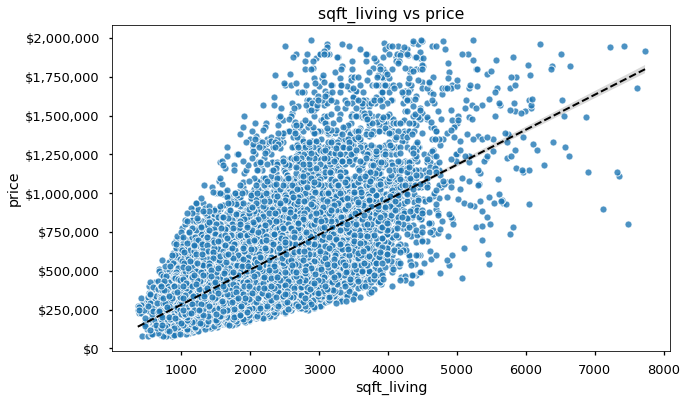

In [ ]:
## Visualize the relationship between sqft_living and price
ax = plot_feature_vs_target(df,x='sqft_living');


### What Our Trendline Tells Us
- Our trendline summarizes the relationship between our feature and our target.
- It is comprised of the: <br>
1) y-intercept (AKA $c$ or $b$ or $\beta_{0}$) indicating the default value of y when X=0.<br>
2) and a slope (AKA $m$ or $\beta$) indicating the relationship between X and y. When X increases by 1, y increases by $m$.

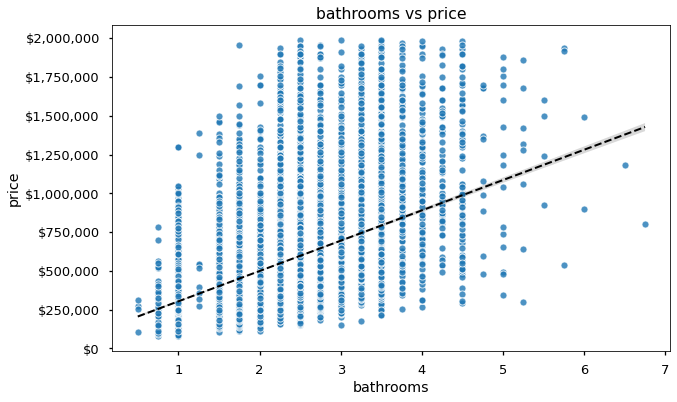

In [ ]:
## Visualize the relationship between bathrooms and price
plot_feature_vs_target(df,x='bathrooms');

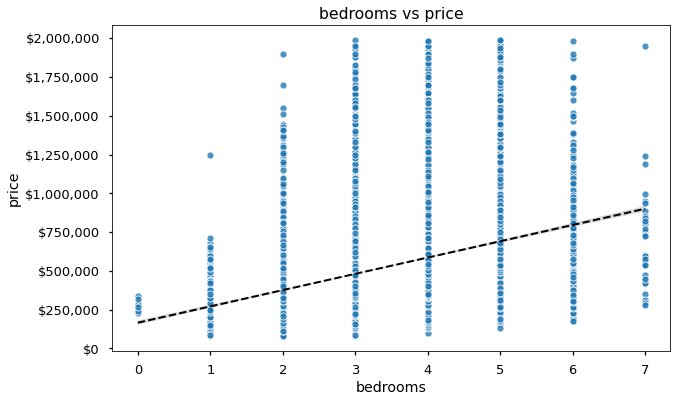

In [ ]:
## Visualize the relationship between bedrooms and price
plot_feature_vs_target(df,x='bedrooms')

>- Now, let's create a Linear Regression model with sci-kit learn to determine the effect of these 3 features!

## Predicting House Price with sci-kit learn's `LinearRegression`

In [ ]:
## Create our X & y using bedrooms,bathrooms, sqft-living
use_cols = ['bedrooms','bathrooms','sqft_living']
X = df[use_cols].copy()
y = df['price'].copy()

## Train test split (random-state 321, test_size=0.25)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=321)
X_train

,bedrooms,bathrooms,sqft_living
4178,3,1.7500,2050
16224,3,2.0000,1340
19203,3,2.0000,2660
195,3,2.5000,1690
5859,3,1.0000,1060
...,...,...,...
12102,2,2.0000,1870
5998,4,2.0000,3410
11155,3,2.5000,1570
4276,4,1.7500,1490


In [ ]:
## import LinearRegression from sklearn and fit the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Get our models' R-squared value for the train and test data
print(f"Training R-Squared: {linreg.score(X_train,y_train):.3f}")
print(f"Test R-Squared: {linreg.score(X_test,y_test):.3f}")

Training R-Squared: 0.477
Test R-Squared: 0.459


>- Ok, so what does this tell us?
    - Our model can explain 52% of the variance of house price using just 3 features!

### What Coefficients Did Our Model Find? 

In [ ]:
linreg.coef_

array([-41206.78404009,  13537.01066319,    243.11350944])

In [ ]:

linreg.intercept_

130191.21548501746

In [ ]:
## NOTE: with more time, we would code this together. 
def get_coeffs(reg,X_train):
    """Extracts the coefficients from a scikit-learn LinearRegression or LogisticRegression"""
    coeffs = pd.Series(reg.coef_.flatten(),index=X_train.columns)

    coeffs.loc['intercept'] = reg.intercept_

    return coeffs

- Linear Regression Equation
$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n  $$
which we can simplify to:
$$ \hat y =  \sum_{i=0}^{N} \beta_i x_i  $$

In [ ]:
## Get the coefficents from the model using our new function
coeffs = get_coeffs(linreg,X_train)
coeffs

bedrooms      -41,206.7840
bathrooms      13,537.0107
sqft_living       243.1135
intercept     130,191.2155
dtype: float64

>- **Each coefficient tells us the effect of increasing the values in that column by 1 unit.** 
>- According to our model, we can determine a home's price using the following results:
    - The model assumed a default/starting house price was \$130,191.2155 (the intercept)
    - For each additional bedrooms, subtract      \$-41,206.78
    - For each batrhoom, add \$13,537.01
    - For each square foot of living space, add \$243.11

In [ ]:
## Let's select an example house and see how we calculate price
i = 300
house = X_test.iloc[i]
house

bedrooms          3.0000
bathrooms         2.2500
sqft_living   2,520.0000
Name: 15659, dtype: float64

In [ ]:
## Calculate the home's predicted price using our coefficients
price = house['bedrooms']*coeffs['bedrooms'] + \
        house['bathrooms']*coeffs['bathrooms'] + \
        house['sqft_living']*coeffs['sqft_living'] + coeffs['intercept']

print(f"${price:,.2f}")

$649,675.18


In [ ]:
coeffs.values

array([-41206.78404009,  13537.01066319,    243.11350944, 130191.21548502])

In [ ]:
## What would our model predict for our test house?
linreg.predict(house.values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([649675.18113678])

In [ ]:
y_test.iloc[i]

420000.0

## Linear Regression Summary
- Linear regression allowed us to predict the exact dollar price of a given home.
- It summarizes the relationship of each feature using coefficients, which are used to calculate the target. 

>-  But what do we do when we want to predict what group a house belongs to instead of an exact price?

# 📚🕹 Diagnosing Linear Regression with Statsmodels

- 06/16/22

In [ ]:
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
## Load in the King's County housing dataset and display the head and info
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv",
                 index_col=0)
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


None

In [ ]:
## Dropping some features for time
df = df.drop(columns=['date','view'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,"221,900.0000",3,1.0000,1180,5650,1.0000,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
6414100192,"538,000.0000",3,2.2500,2570,7242,2.0000,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
5631500400,"180,000.0000",2,1.0000,770,10000,1.0000,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
2487200875,"604,000.0000",4,3.0000,1960,5000,1.0000,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
1954400510,"510,000.0000",3,2.0000,1680,8080,1.0000,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,"360,000.0000",3,2.5000,1530,1131,3.0000,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
6600060120,"400,000.0000",4,2.5000,2310,5813,2.0000,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
1523300141,"402,101.0000",2,0.7500,1020,1350,2.0000,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007


In [ ]:
## Treating zipcode as a category
df['zipcode'] = df['zipcode'].astype(str)

### Train Test Split

In [ ]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
1795900120,3,2.5000,2250,9235,2.0000,0,3,8,2250,0,1985,0,98052,47.7268,-122.1050,2290,8187
6788201240,4,2.7500,1590,6000,1.5000,0,4,8,1590,0,1925,0,98112,47.6401,-122.2990,1590,4000
2461900550,4,1.7500,2040,6000,1.0000,0,5,7,1020,1020,1943,0,98136,47.5507,-122.3830,1440,6000
1775920210,3,1.0000,1200,9800,1.0000,0,4,7,1200,0,1971,0,98072,47.7412,-122.1090,1220,10220
2310010050,3,2.2500,1570,8767,1.0000,0,3,7,1180,390,1990,0,98038,47.3568,-122.0380,1570,7434


In [ ]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)
cat_cols

['zipcode']

In [ ]:
# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)
num_cols


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'waterfront',
                                  'condition', 'grade', 'sqft_above',
                                  'sqft_basement', 'yr_built', 'yr_renovated',
                                  'lat', 'long', 'sqft_living15',
                                  'sqft_lot15']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
          

In [ ]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features]
len(final_features)

86

In [ ]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
1795900120,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6788201240,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2461900550,4.0000,1.7500,"2,040.0000","6,000.0000",1.0000,0.0000,5.0000,7.0000,"1,020.0000","1,020.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1775920210,3.0000,1.0000,"1,200.0000","9,800.0000",1.0000,0.0000,4.0000,7.0000,"1,200.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2310010050,3.0000,2.2500,"1,570.0000","8,767.0000",1.0000,0.0000,3.0000,7.0000,"1,180.0000",390.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
3835500005,2.0000,1.7500,"2,050.0000","11,900.0000",1.0000,0.0000,4.0000,8.0000,"2,050.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2202500110,3.0000,1.5000,"1,690.0000","9,708.0000",1.5000,0.0000,5.0000,7.0000,"1,690.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3761700053,3.0000,2.7500,"3,470.0000","9,610.0000",3.0000,1.0000,3.0000,11.0000,"3,470.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7212650950,4.0000,2.5000,"2,530.0000","8,169.0000",2.0000,0.0000,3.0000,8.0000,"2,530.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
322069180,3.0000,3.0000,"3,730.0000","383,328.0000",1.5000,0.0000,4.0000,9.0000,"2,230.0000","1,500.0000",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
##import statsmodels correctly
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
id,,,,,,,,,,,,,,,,,,,,,
1795900120,3.0000,2.5000,"2,250.0000","9,235.0000",2.0000,0.0000,3.0000,8.0000,"2,250.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
6788201240,4.0000,2.7500,"1,590.0000","6,000.0000",1.5000,0.0000,4.0000,8.0000,"1,590.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,const
id,,,,,,,,,,,,,,,,,,,,,
3835500005,2.0000,1.7500,"2,050.0000","11,900.0000",1.0000,0.0000,4.0000,8.0000,"2,050.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2202500110,3.0000,1.5000,"1,690.0000","9,708.0000",1.5000,0.0000,5.0000,7.0000,"1,690.0000",0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


# Modeling with Statsmodels OLS

In [ ]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     773.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:02:53   Log-Likelihood:            -2.1766e+05
No. Observations:               16209   AIC:                         4.355e+05
Df Residuals:                   16124   BIC:                         4.361e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.75e+04   1787.879    -15.383      0.000    -3.1e+04    -2.4e+04
bathrooms      2.487e+04   3085.738      8.059      0.000    1.88e+04    3.09e+04
sqft_living     114.1287      2.178     52.396      0.000     109.859     118.398
sqft_lot          0.2617      0.045      5.867      0.000       0.174       0.349
floors        -4.439e+04   3735.852    -11.881      0.000   -5.17e+04   -3.71e+04
waterfront     8.388e+05   1.54e+04     54.532      0.000    8.09e+05    8.69e+05
condition      2.506e+04   2276.565     11.009      0.000    2.06e+04    2.95e+04
grade          6.458e+04   2139.360     30.188      0.000    6.04e+04    6.88e+04
sqft_above       86.4949      2.234     38.712      0.000      82.115      90.874
sqft_basement    27.6337      2.543     10.866      0.000      22.649      32.619
yr_built       -790.0171     76.684    -10.302      0.000    -940.327    -639.707
yr_renovated     16.8340      3.467      4.856      0.000      10.039      23.629
lat            1.457e+05   7.48e+04      1.947      0.052    -988.291    2.92e+05
long          -1.451e+05   5.31e+04     -2.730      0.006   -2.49e+05   -4.09e+04
sqft_living15    28.3158      3.382      8.372      0.000      21.687      34.945
sqft_lot15       -0.0954      0.069     -1.374      0.169      -0.232       0.041
zipcode_98001  -5.01e+05   9.84e+04     -5.089      0.000   -6.94e+05   -3.08e+05
zipcode_98002 -4.658e+05    9.6e+04     -4.851      0.000   -6.54e+05   -2.78e+05
zipcode_98003 -5.248e+05   1.01e+05     -5.212      0.000   -7.22e+05   -3.27e+05
zipcode_98004  2.372e+05   1.04e+05      2.283      0.022    3.36e+04    4.41e+05
zipcode_98005 -2.472e+05   1.03e+05     -2.410      0.016   -4.48e+05   -4.62e+04
zipcode_98006 -2.627e+05   9.91e+04     -2.651      0.008   -4.57e+05   -6.85e+04
zipcode_98007 -2.971e+05   1.02e+05     -2.924      0.003   -4.96e+05   -9.79e+04
zipcode_98008  -2.64e+05   9.99e+04     -2.642      0.008    -4.6e+05   -6.82e+04
zipcode_98010 -4.093e+05   8.73e+04     -4.688      0.000    -5.8e+05   -2.38e+05
zipcode_98011 -4.534e+05   1.09e+05     -4.149      0.000   -6.68e+05   -2.39e+05
zipcode_98014 -4.021e+05   9.22e+04     -4.363      0.000   -5.83e+05   -2.21e+05
zipcode_98019 -4.412e+05   9.85e+04     -4.480      0.000   -6.34e+05   -2.48e+05
zipcode_98022 -4.347e+05   8.34e+04     -5.212      0.000   -5.98e+05   -2.71e+05
zipcode_98023 -5.597e+05   1.03e+05     -5.432      0.000   -7.62e+05   -3.58e+05
zipcode_98024 -3.282e+05   9.08e+04     -3.615      0.000   -5.06e+05    -1.5e+05
zipcode_98027  -3.36e+05   9.33e+04     -3.600      0.000   -5.19e+05   -1.53e+05
zipcode_98028 -4.521e+05   1.11e+05     -4.071      0.000    -6.7e+05   -2.34e+05
zipcode_98029 -3.066e+05   9.29e+04     -3.299      0.001   -4.89e+05   -1.24e+05
zipcode_98030 -5.002e+05    9.6e+04     -5.210   

In [ ]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.801
Testing R^2: 0.792


## The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

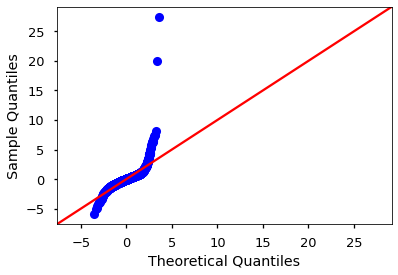

In [ ]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

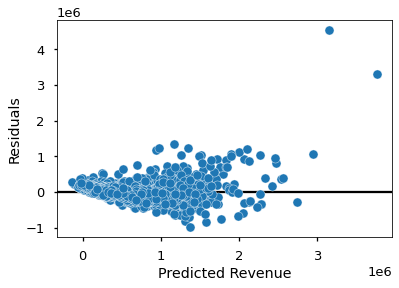

In [ ]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

In [ ]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     773.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:05:04   Log-Likelihood:            -2.1766e+05
No. Observations:               16209   AIC:                         4.355e+05
Df Residuals:                   16124   BIC:                         4.361e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.75e+04   1787.879    -15.383      0.000    -3.1e+04    -2.4e+04
bathrooms      2.487e+04   3085.738      8.059      0.000    1.88e+04    3.09e+04
sqft_living     114.1287      2.178     52.396      0.000     109.859     118.398
sqft_lot          0.2617      0.045      5.867      0.000       0.174       0.349
floors        -4.439e+04   3735.852    -11.881      0.000   -5.17e+04   -3.71e+04
waterfront     8.388e+05   1.54e+04     54.532      0.000    8.09e+05    8.69e+05
condition      2.506e+04   2276.565     11.009      0.000    2.06e+04    2.95e+04
grade          6.458e+04   2139.360     30.188      0.000    6.04e+04    6.88e+04
sqft_above       86.4949      2.234     38.712      0.000      82.115      90.874
sqft_basement    27.6337      2.543     10.866      0.000      22.649      32.619
yr_built       -790.0171     76.684    -10.302      0.000    -940.327    -639.707
yr_renovated     16.8340      3.467      4.856      0.000      10.039      23.629
lat            1.457e+05   7.48e+04      1.947      0.052    -988.291    2.92e+05
long          -1.451e+05   5.31e+04     -2.730      0.006   -2.49e+05   -4.09e+04
sqft_living15    28.3158      3.382      8.372      0.000      21.687      34.945
sqft_lot15       -0.0954      0.069     -1.374      0.169      -0.232       0.041
zipcode_98001  -5.01e+05   9.84e+04     -5.089      0.000   -6.94e+05   -3.08e+05
zipcode_98002 -4.658e+05    9.6e+04     -4.851      0.000   -6.54e+05   -2.78e+05
zipcode_98003 -5.248e+05   1.01e+05     -5.212      0.000   -7.22e+05   -3.27e+05
zipcode_98004  2.372e+05   1.04e+05      2.283      0.022    3.36e+04    4.41e+05
zipcode_98005 -2.472e+05   1.03e+05     -2.410      0.016   -4.48e+05   -4.62e+04
zipcode_98006 -2.627e+05   9.91e+04     -2.651      0.008   -4.57e+05   -6.85e+04
zipcode_98007 -2.971e+05   1.02e+05     -2.924      0.003   -4.96e+05   -9.79e+04
zipcode_98008  -2.64e+05   9.99e+04     -2.642      0.008    -4.6e+05   -6.82e+04
zipcode_98010 -4.093e+05   8.73e+04     -4.688      0.000    -5.8e+05   -2.38e+05
zipcode_98011 -4.534e+05   1.09e+05     -4.149      0.000   -6.68e+05   -2.39e+05
zipcode_98014 -4.021e+05   9.22e+04     -4.363      0.000   -5.83e+05   -2.21e+05
zipcode_98019 -4.412e+05   9.85e+04     -4.480      0.000   -6.34e+05   -2.48e+05
zipcode_98022 -4.347e+05   8.34e+04     -5.212      0.000   -5.98e+05   -2.71e+05
zipcode_98023 -5.597e+05   1.03e+05     -5.432      0.000   -7.62e+05   -3.58e+05
zipcode_98024 -3.282e+05   9.08e+04     -3.615      0.000   -5.06e+05    -1.5e+05
zipcode_98027  -3.36e+05   9.33e+04     -3.600      0.000   -5.19e+05   -1.53e+05
zipcode_98028 -4.521e+05   1.11e+05     -4.071      0.000    -6.7e+05   -2.34e+05
zipcode_98029 -3.066e+05   9.29e+04     -3.299      0.001   -4.89e+05   -1.24e+05
zipcode_98030 -5.002e+05    9.6e+04     -5.210   

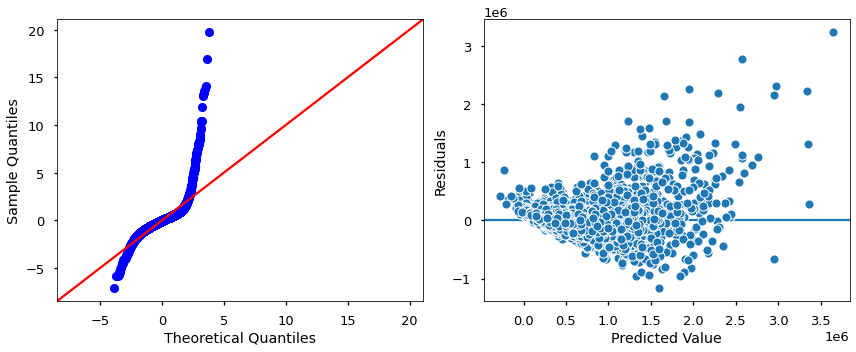

In [ ]:

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df, y_train)

## Improving Our Model

In [ ]:
from scipy import stats
def find_outliers_Z(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers